In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import constants as constants
from scipy.optimize import curve_fit

In [3]:
plt.style.use(["science",'notebook','grid'])

In [4]:
I0=8951
I=6830
x=1.6
r=2.699
a=662/511
sth=0.662

In [5]:
m=np.log(I0/I)/x
m

0.16902536519131445

In [6]:
M=m/r
M

0.0626251816196052

In [7]:
skn=0.75*sth*(((1+a)/(a**2))*(((2+2*a)/(1+2*a))-(np.log(1+2*a)/a))+(np.log(1+2*a)/(2*a))-((1+3*a)/(1+2*a)**2))
skn

0.25489082457807927

In [8]:
mkn=r*constants.N_A*(13/27)*skn*(10**(-24))
mkn

0.1994745882753694

In [9]:
theta=np.array([30,45,60,75,90])
th=theta*np.pi/180
cos=1-np.cos(th)


In [10]:
ch=np.array([313,248,208,173,148])
Esc=ch*1.99-33.79

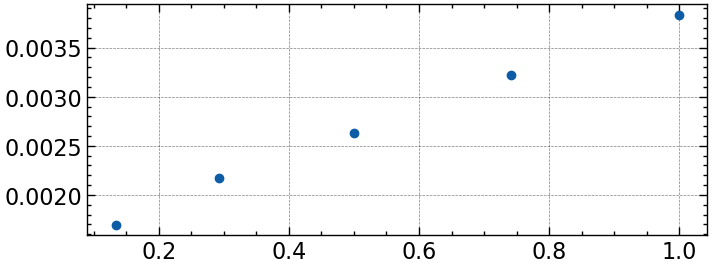

In [11]:
plt.figure(figsize=(8,3),label='Exp')
plt.scatter(cos,1/Esc)

In [12]:
def f(x,a,b):
    return a*x+b

In [13]:
popt,pcov=curve_fit(f,cos,1/Esc,p0=(0.002,0.001))

In [14]:
popt

array([0.00243416, 0.00141303])

In [15]:
pcov

array([[ 2.99254811e-09, -1.59685285e-09],
       [-1.59685285e-09,  1.13901458e-09]])

In [16]:
a_opt,b_opt=popt
x_model=np.linspace(min(cos),max(cos),100)
y_model=f(x_model,a_opt,b_opt)

In [17]:
textstr1=' '.join((
    r'$Linear fit (\alpha\cdot x+\beta):$',r'$\alpha=%.4f keV^{-1}$' % (popt[0]),r'$\beta=%.4f keV^{-1}$' % (popt[1])
))

In [18]:
theory=0.00151+0.001957*(cos)

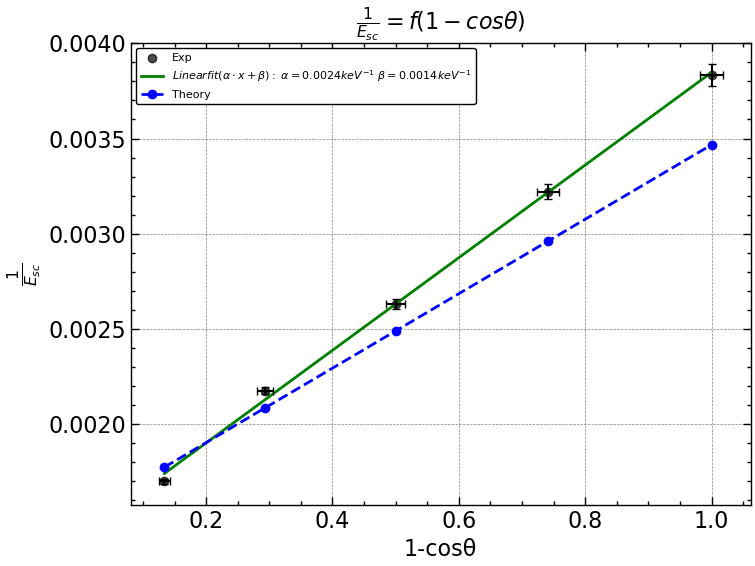

In [19]:
#plt.figure(figsize=(8,3),label='Exp')
plt.scatter(cos,1/Esc,color='black',alpha=0.7,label='Exp')
plt.plot(x_model,y_model,color='green',label=textstr1 )
plt.plot(cos,theory,'o--',color='blue',label='Theory')
#plt.text(0.15,0.0031,textstr1,bbox=dict(facecolor='white',edgecolor='black'))
plt.title(r'$\frac{1}{E_{sc}} = f(1-cos\theta)$')
plt.xlabel("1-cosθ")
plt.ylabel(r'$\frac{1}{E_{sc}}$')
xerror=np.sin(theta*np.pi/180)*np.pi/180
yerror=(1.99*2)/(Esc**2)
plt.errorbar(cos,1/Esc,xerr=xerror,yerr=yerror,fmt='o',ms=2,linewidth=1.5,color='black',capsize=3)
plt.legend(facecolor='white',edgecolor='black',fontsize=8)
plt.show()

In [20]:
mex=np.array([0.2899,(0.3318+0.4037)/2,0.4037,0.5615,(1.108+0.5615)/2])
eth=1-np.exp(-mex*5)
eth

array([0.7653124 , 0.84098393, 0.8671454 , 0.93964431, 0.98460558])

In [21]:
sm=np.array([26270,11040,9807,8436,7499])
sm_t=sm/300
logos=sm_t/eth
logos45=sm_t[1]/eth[1]

In [22]:
logos_norm=logos/logos45
logos_norm

array([2.61480885, 1.        , 0.86151506, 0.68389859, 0.5801759 ])

In [32]:
txt1=''.join(r"$(\frac{d_e\sigma^{incoh}}{d\Omega})^\theta _{45}$")
txt2=r'$(\frac{d_e\sigma^{KN}}{d\Omega})^\theta _{45}$'

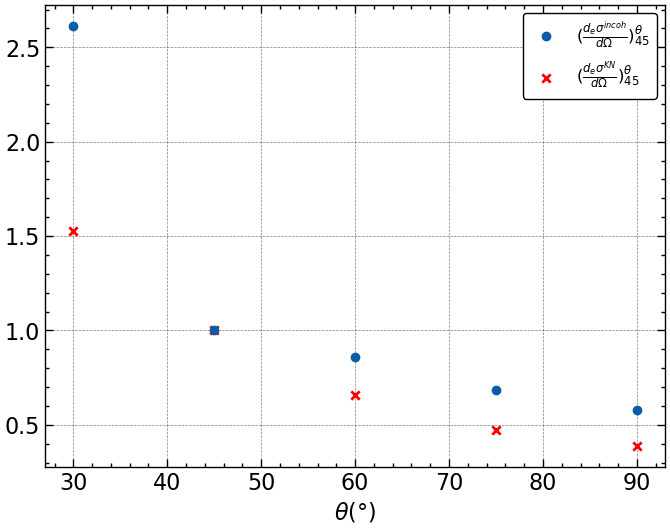

In [42]:
logos_KN=np.array([1.529,1.000,0.657,0.475,0.390])
plt.plot(th*180/np.pi,logos_norm,"o",label=txt1)
plt.scatter(th*180/np.pi,logos_KN,marker='x',color='red',label=txt2)
plt.legend(facecolor='white',edgecolor='black',fontsize=12)
plt.xlabel(r"$\theta( °)$")
plt.grid(True)